In [43]:


import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits
plt.rcParams['figure.figsize'] = (10, 8)


In [44]:

tutorial_path = "/Users/alexis/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"
h = fits.open(tutorial_path)
h = fits.open(tutorial_path)
data = h[0].data.astype(np.float32)   
h.close()


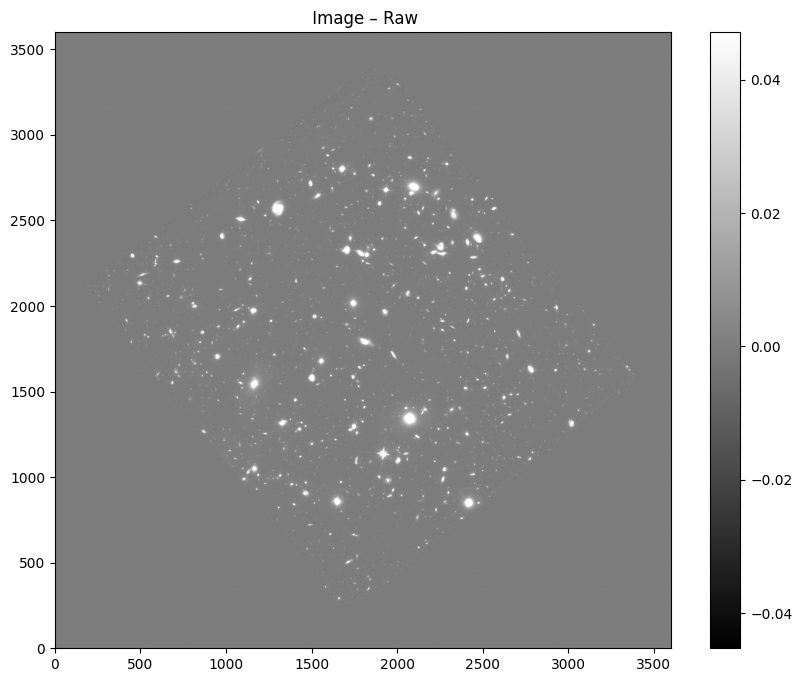

In [45]:


m, s = np.mean(data), np.std(data)

plt.imshow(data, cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title(" Image – Raw")
plt.savefig( "star", dpi=150)
plt.show()


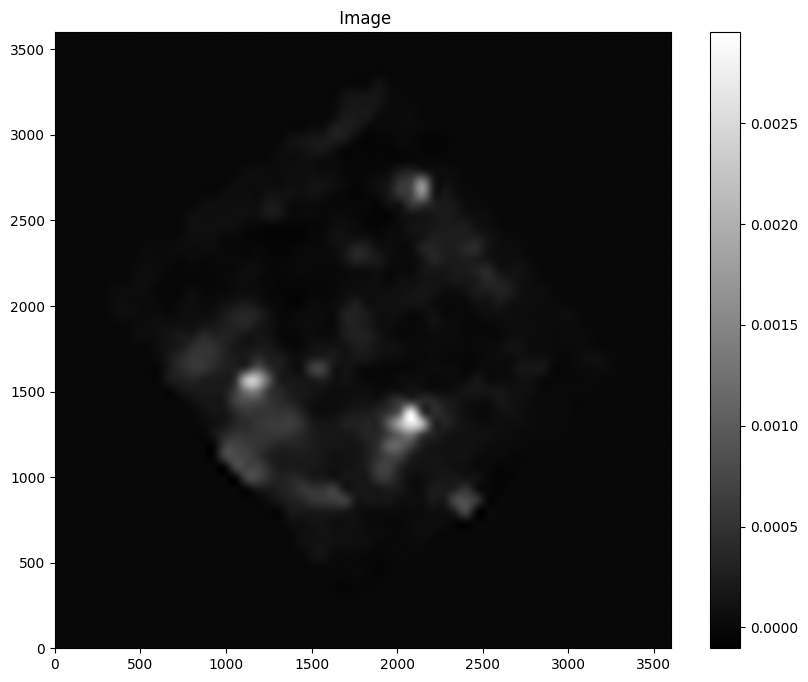

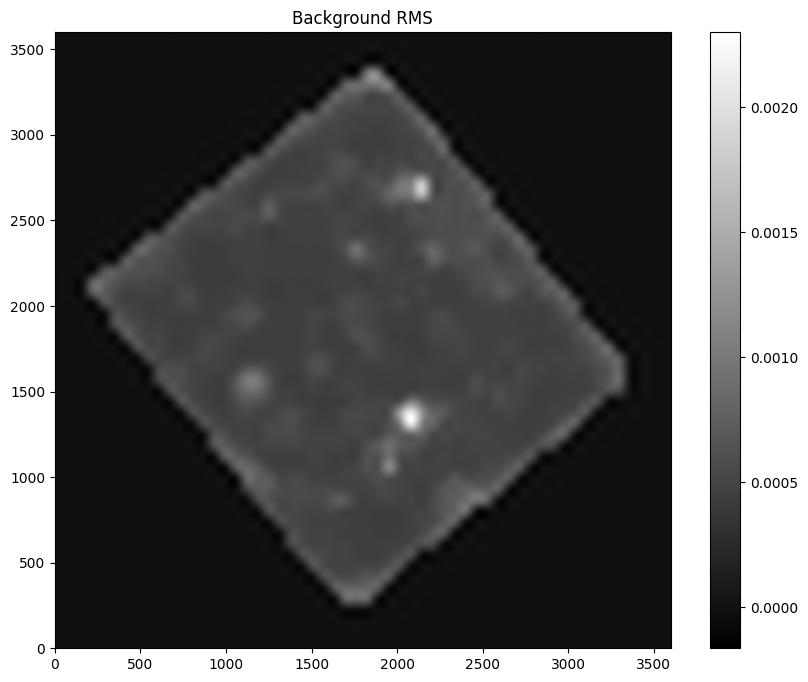

In [51]:


bkg = sep.Background(data)

bkg_image = bkg.back()
bkg_rms   = bkg.rms()

plt.imshow(bkg_image, cmap='gray', origin='lower')
plt.colorbar()
plt.title(" Image")
plt.savefig("background.png", dpi=150)
plt.show()


plt.imshow(bkg_rms, cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background RMS")
plt.savefig("background_rms.png", dpi=150)
plt.show()


Number of objects detected: 7652


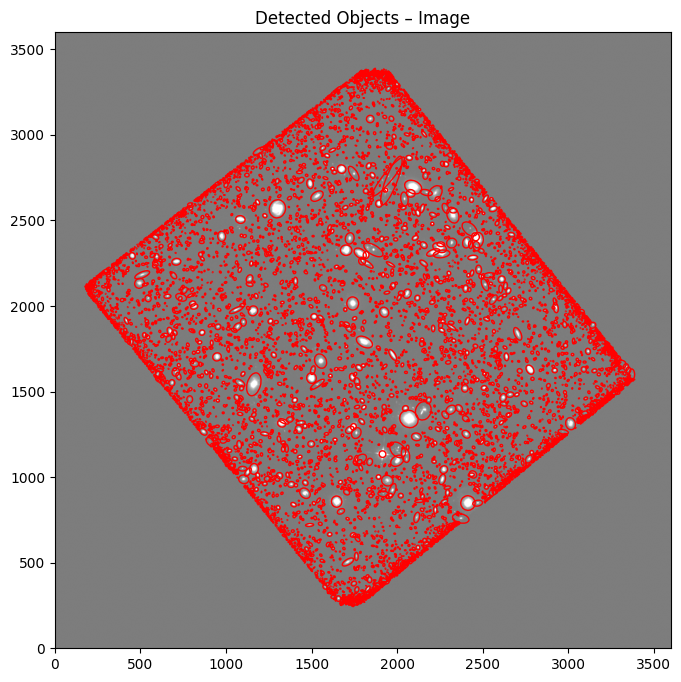

In [50]:

data_sub = data - bkg

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

print("Number of objects detected:", len(objects))


from matplotlib.patches import Ellipse

plt.imshow(data_sub, cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6*obj['a'], height=6*obj['b'],
                angle=obj['theta']*180/np.pi,
                edgecolor='red', facecolor='none')
    plt.gca().add_patch(e)

plt.title("Detected Objects – Image")
plt.savefig("detections.png", dpi=150)
plt.show()


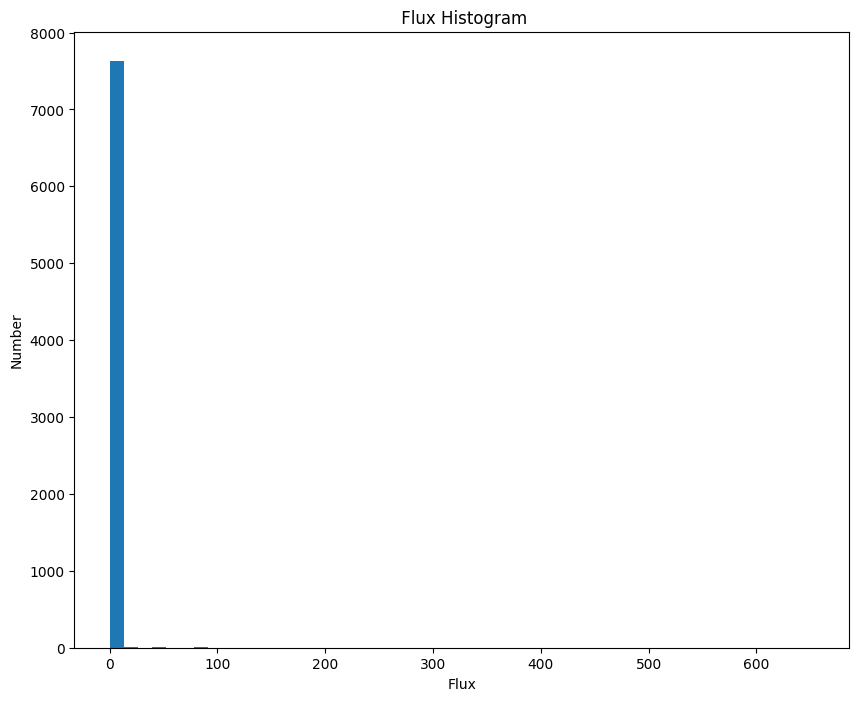

In [52]:


flux, fluxerr, flag = sep.sum_circle(
    data_sub, objects['x'], objects['y'],
    r=3.0, err=bkg.globalrms, gain=1.0
)


plt.hist(flux, bins=50)
plt.xlabel("Flux")
plt.ylabel("Number")
plt.title(" Flux Histogram")
plt.savefig("flux_hist.png", dpi=150)
plt.show()


In [53]:


f105_path = "/Users/alexis/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

h = fits.open(f105_path)
f105 = h[0].data.astype(np.float32)
h.close()



print("HUDF f105w shape:", f105.shape)


HUDF f105w shape: (3600, 3600)


In [54]:

bkg = sep.Background(f105)
f105_sub = f105 - bkg


In [55]:

objects = sep.extract(f105_sub, 1.5, err=bkg.globalrms)

print("Number of sources detected in f105w =", len(objects))


Number of sources detected in f105w = 8640


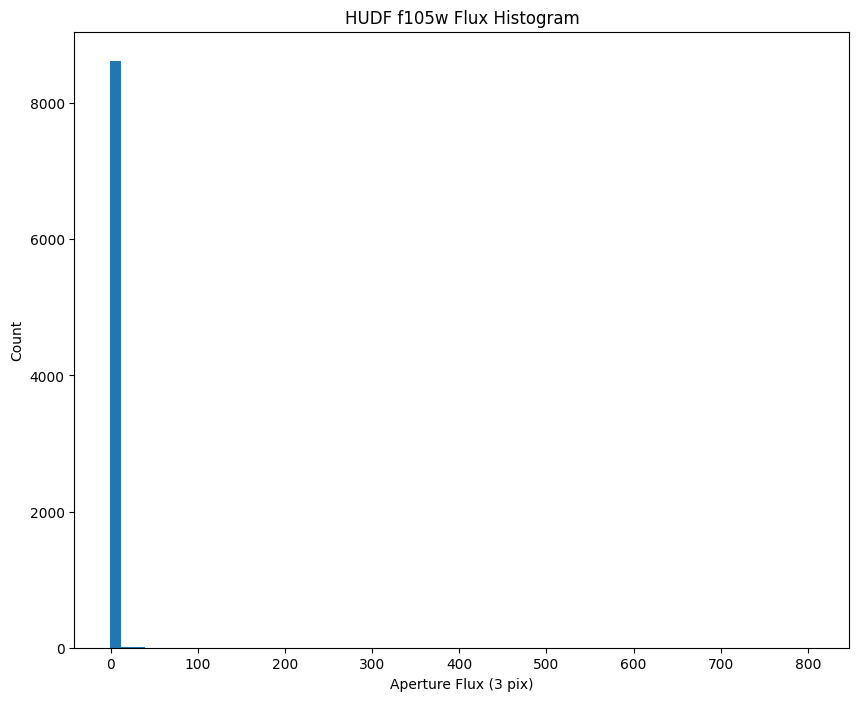

Mean flux: 0.3618620007201894
Median flux: 0.03095655805023853
Std dev flux: 9.243527842777791


In [38]:

flux, fluxerr, flag = sep.sum_circle(
    f105_sub, objects['x'], objects['y'],
    r=3.0, err=bkg.globalrms, gain=1.0
)

plt.hist(flux, bins=60)
plt.xlabel("Aperture Flux (3 pix)")
plt.ylabel("Count")
plt.title("HUDF f105w Flux Histogram")
plt.savefig("f105_flux_hist.png", dpi=150)
plt.show()

mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_flux = np.std(flux)

print("Mean flux:", mean_flux)
print("Median flux:", median_flux)
print("Std dev flux:", std_flux)


In [39]:

max_idx = np.argmax(flux)
max_flux = flux[max_idx]
x_max    = objects['x'][max_idx]
y_max    = objects['y'][max_idx]

z_score = (max_flux - mean_flux) / std_flux

print("Brightest object flux:", max_flux)
print("Its position: x =", x_max, " y =", y_max)
print("It is", z_score, "standard deviations from the mean")


Brightest object flux: 807.2972835731507
Its position: x = 1914.2549094866436  y = 1134.3164850725645
It is 87.2973431029269 standard deviations from the mean


In [40]:

f125_path = "/Users/alexis/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
f160_path = "/Users/alexis/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

f125 = fits.open(f125_path)[0].data.astype(np.float32)
f160 = fits.open(f160_path)[0].data.astype(np.float32)

In [41]:

def scale(img):
    lo = np.percentile(img, 1)
    hi = np.percentile(img, 99)
    return np.clip((img - lo) / (hi - lo), 0, 1)

R = scale(f160)   
G = scale(f125)   
B = scale(f105)

rgb = np.dstack([R, G, B])


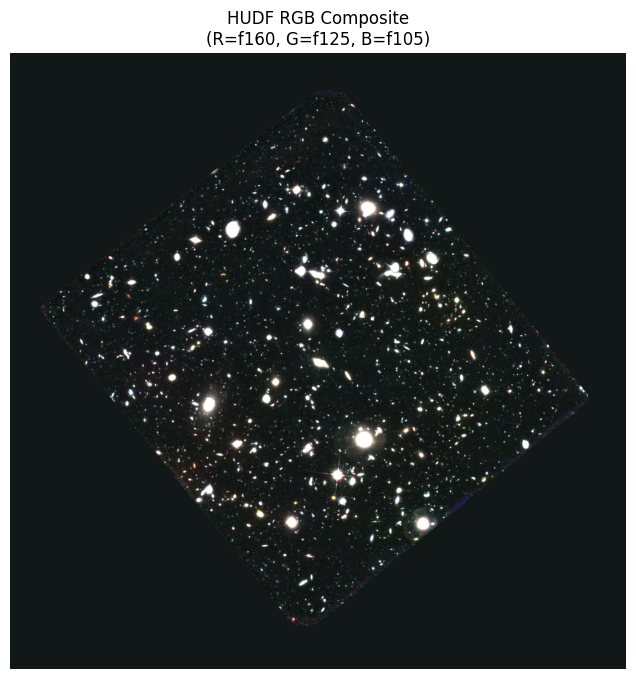

In [42]:

plt.imshow(rgb, origin='lower')
plt.axis('off')
plt.title("HUDF RGB Composite\n(R=f160, G=f125, B=f105)")
plt.savefig("HUDF_RGB.png", dpi=300, bbox_inches='tight')
plt.show()
